# Problem 5: Bike Sharing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The *'bike_sharing.csv'* dataset contains daily counts of rented bikes in Washington, D.C., USA, in years 2011 and 2012,
with the corresponding weather and seasonal information that may affect the number of rented bikes.
For
each day in the years 2011 and 2012 (731 days in total), the dataset collects the number of bikes rented that day by unregistered users (e.g. tourists, or other visitors of the city) and by registered users (residents).

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/bike_sharing.csv'
data = pd.read_csv(url)
data

,dteday,season,holiday,temp,hum,ratio,weekday
0,2011-01-01,1,0,8.175849,80.5833,33.60,6
1,2011-01-02,1,0,9.083466,69.6087,16.35,7
2,2011-01-03,1,0,1.229108,43.7273,8.90,1
3,2011-01-04,1,0,1.400000,59.0435,6.91,2
4,2011-01-05,1,0,2.666979,43.6957,5.12,3
...,...,...,...,...,...,...,...
726,2012-12-27,1,0,3.945849,65.2917,11.68,4
727,2012-12-28,1,0,3.906651,59.0000,20.81,5
728,2012-12-29,1,0,3.906651,75.2917,11.86,6
729,2012-12-30,1,0,4.024151,48.3333,20.27,7


**Data Description**

| Feature | Description |
| :- | -: |
| dteday | date|
| season | 1 - winter, 2 -spring, 3 - summer, 4 - fall |
| holiday | 0 - not a holiday, 1 - holiday |
| temp | daily mean temperature (°C) |
| hum | daily mean humidity (%) |
| weekday |  day of the week: 1 - Monday, 2 - Tuesday,..., 7 - Sunday |
| ratio | proportion of unregistered users (tourists) to the total number of daily users (%) |

The **goal** is to fit a linear regression model to predict the proportion of tourist rentals to the total number of daily users (variable ratio) based on the other variables (season, holiday, temp, hum, weekday).

In [3]:
y = data['ratio'].to_numpy()

Text(0, 0.5, 'proportion of tourist rentals')

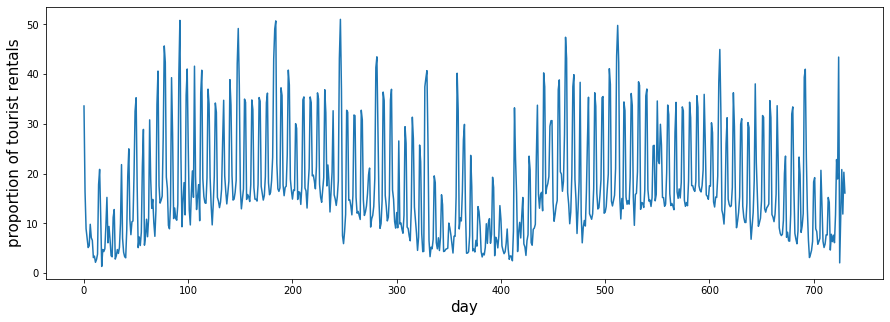

In [4]:
plt.figure(figsize=(15,5))
plt.plot(y)
plt.xlabel('day',fontsize=15)
plt.ylabel('proportion of tourist rentals',fontsize=15)

## Fitting a linear model

In [5]:
m = len(data)
m

731

In [6]:
features = ['season','holiday','temp','hum','weekday']
X = data[features].to_numpy()
X = np.c_[np.ones(m),X] # add bias

In [7]:
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

In [8]:
y_pred = X.dot(theta)

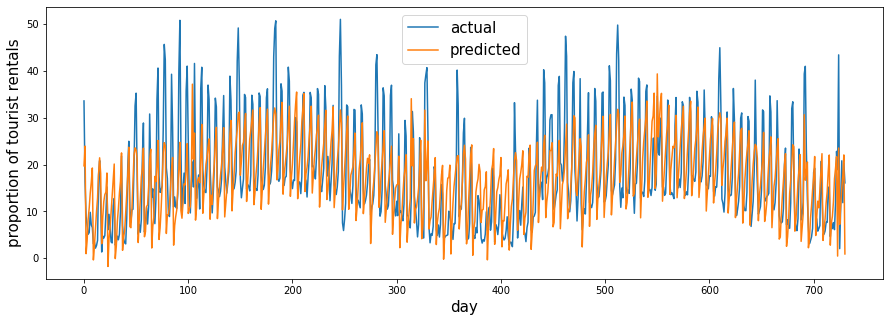

In [9]:
plt.figure(figsize=(15,5))
plt.plot(y, label='actual')
plt.plot(y_pred, label='predicted')
plt.xlabel('day',fontsize=15)
plt.ylabel('proportion of tourist rentals',fontsize=15)
plt.legend(fontsize=15)

## Fitting a Polynomial Model

In [10]:
features = ['season','holiday','temp','hum','weekday']
X = data[features].to_numpy()

In [11]:
m,n = X.shape

In [12]:
# scale the data
means = X.mean(axis=0) # mean along rows (axis=0)
s = X.std(axis=0) # standard deviation along rows
X = (X-means)/s # remove the mean and scale to unit variance

In [13]:
from itertools import chain
from itertools import combinations_with_replacement as comb_w_r

In [20]:
# number of polynomial features
degree = 4
combinations  = chain.from_iterable(comb_w_r(range(n), i) for i in range(1, degree+1))
n_poly = sum(1 for comb in combinations)
n_poly

125

In [21]:
# polynomial features
combinations  = chain.from_iterable(comb_w_r(range(n), i) for i in range(1, degree+1))
XP = np.ones((m,n_poly))
for col_idx,combination in enumerate(combinations):  
    for idx in combination:
        XP[:,col_idx]= XP[:,col_idx]*X[:,idx]

In [22]:
# add bias
XP = np.c_[np.ones(m),XP]

In [23]:
# fit a linear model to the data
theta = np.linalg.solve(XP.T.dot(XP),XP.T.dot(y))

In [24]:
# use the linear model to predict the vector y
y_pred = XP.dot(theta)

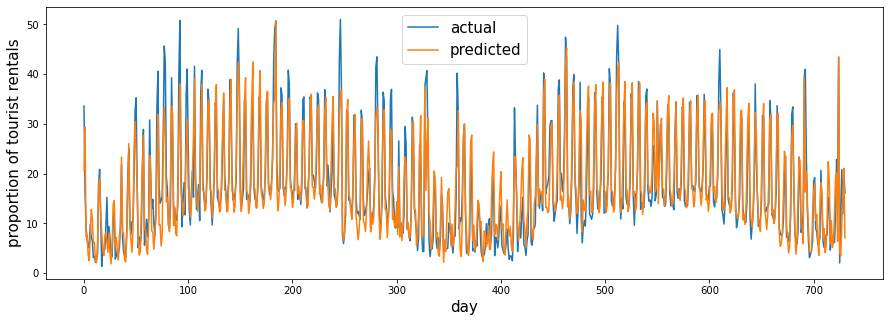

In [25]:
plt.figure(figsize=(15,5))
plt.plot(y, label='actual')
plt.plot(y_pred, label='predicted')
plt.xlabel('day',fontsize=15)
plt.ylabel('proportion of tourist rentals',fontsize=15)
plt.legend(fontsize=15)